In [2]:
pip install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as pl
import csv
import numpy as np

# OpenMP APM

## Speed up plot with different pattern lengths

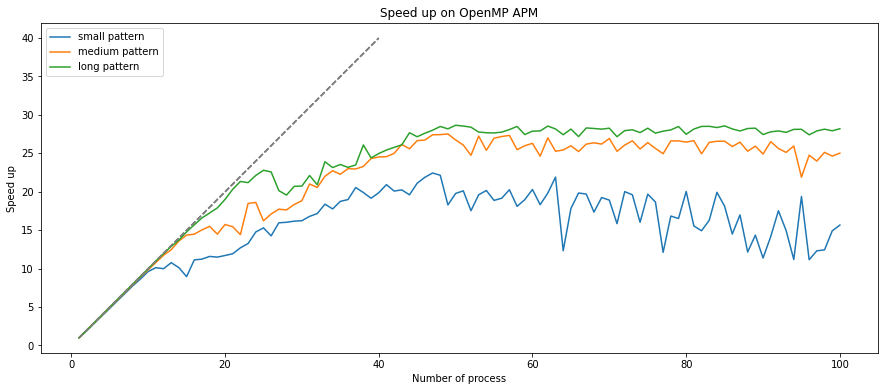

In [4]:
T_s = []
T_p = [[],[],[]]


with open('./apm/apm_omp/out_omp', 'r') as out_file:
    tsv_reader = csv.reader(out_file, delimiter='\t')
    first = True
    for row in tsv_reader :
        if first :
            first = False
            T_s = [float(row[i]) for i in range(3)]
        for j in range(3) :
            T_p[j].append(float(row[j]))

title = "Speed up on OpenMP APM"
N_p = 100  

labels = ["small pattern","medium pattern","long pattern"]
P_omp = [p for p in range(1,N_p + 1)]

for i in range(3) :
    S = list(map(lambda x : T_s[i]/x, T_p[i]))
    pl.figure(1, figsize=(15, 15))
    pl.plot(P_omp,S,label=labels[i])
    pl.plot(P_omp[:40],P_omp[:40],color="grey",linestyle='dashed')
    pl.axis('scaled')
    pl.xlabel('Number of process')
    pl.ylabel('Speed up')
    pl.legend(loc="upper left")
    pl.title(title)
    
pl.show()

## Average Speed up plot

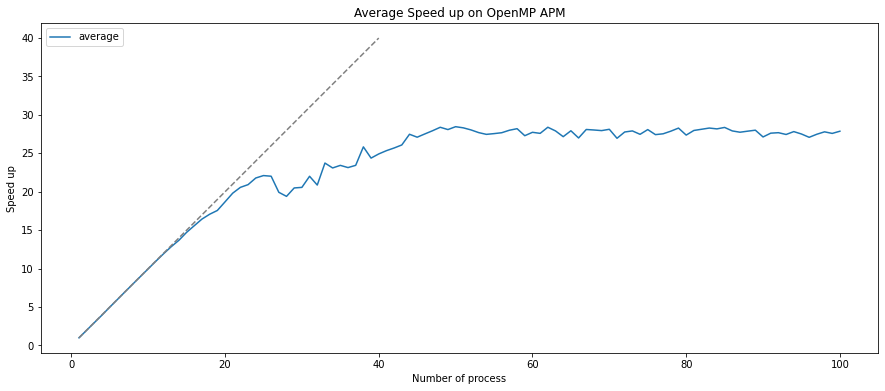

In [5]:
title = "Average Speed up on OpenMP APM"

T_sAVG = (T_s[0] + T_s[1]*3 + T_s[2]*7)/11
T_pAVG = [(T_p[0][i] + T_p[1][i]*3 + T_p[2][i]*7)/11 for i in range(len(T_p[0]))]

S_omp_AVG = list(map(lambda x : T_sAVG/x, T_pAVG))

pl.figure(1, figsize=(15, 15))
pl.plot(P_omp,S_omp_AVG,label="average")
pl.plot(P_omp[:40],P_omp[:40],color="grey",linestyle='dashed')

# log regression : not appropriated
# pmax_reg = 100
# x = np.array(P_omp[:pmax_reg])
# y = np.array(S_omp_AVG[:pmax_reg])
# reg_coef = np.polyfit(np.log(x), y, 1)
#
# X = np.linspace(0,100,1000)
# Y = [reg_coef[0]*np.log(x) + reg_coef[1] for x in X]
# pl.plot(X[1:],Y[1:],color="black",label="log regression")

pl.axis('scaled')
pl.xlabel('Number of process')
pl.ylabel('Speed up')
pl.legend(loc="upper left")
pl.title(title)


pl.show()

# MPI APM

## Speed up plot with different pattern lengths

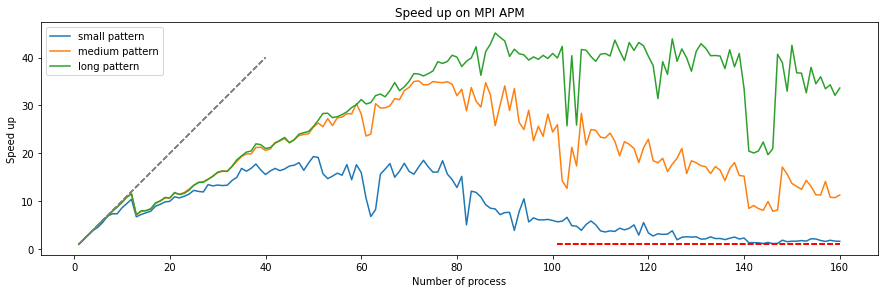

In [6]:
T_s = []
T_p = [[],[],[]]


with open('./apm/apm_mpi/out_mpi', 'r') as out_file:
    tsv_reader = csv.reader(out_file, delimiter='\t')
    first = True
    for row in tsv_reader :
        if first :
            first = False
            T_s = [float(row[i]) for i in range(3)]
        for j in range(3) :
            T_p[j].append(float(row[j]))

title = "Speed up on MPI APM"
N_p = 160  

labels = ["small pattern","medium pattern","long pattern"]
P_mpi = [p for p in range(1,N_p + 1)]

for i in range(3) :
    S = list(map(lambda x : T_s[i]/x, T_p[i]))
    pl.figure(1, figsize=(15, 15))
    pl.plot(P_mpi,S,label=labels[i])
    pl.plot(P_mpi[:40],P_mpi[:40],color="grey",linestyle='dashed')
    pl.plot(P_mpi[100:],[1 for p in P_mpi[100:]],color="red",linestyle='dashed')
    pl.axis('scaled')
    pl.xlabel('Number of process')
    pl.ylabel('Speed up')
    pl.legend(loc="upper left")
    pl.title(title)
    
pl.show()

## Average Speed up plot

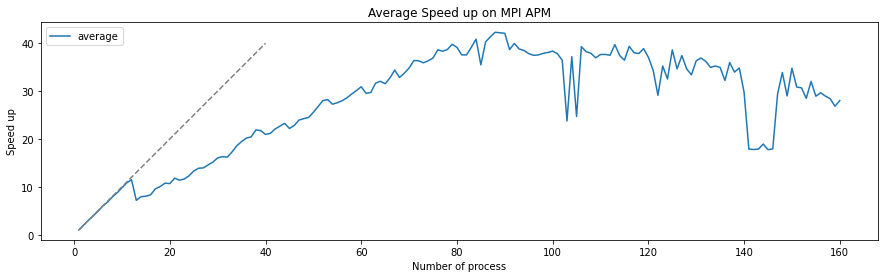

In [7]:
title = "Average Speed up on MPI APM"
T_sAVG = (T_s[0] + T_s[1]*3 + T_s[2]*7)/11
T_pAVG = [(T_p[0][i] + T_p[1][i]*3 + T_p[2][i]*7)/11 for i in range(len(T_p[0]))]

S_mpi_AVG = list(map(lambda x : T_sAVG/x, T_pAVG))

pl.figure(1, figsize=(15, 15))
pl.plot(P_mpi,S_mpi_AVG,label="average")
pl.plot(P_mpi[:40],P_mpi[:40],color="grey",linestyle='dashed')
pl.axis('scaled')
pl.xlabel('Number of process')
pl.ylabel('Speed up')
pl.legend(loc="upper left")
pl.title(title)

pl.show()

## OpenMP / MPI Comparision

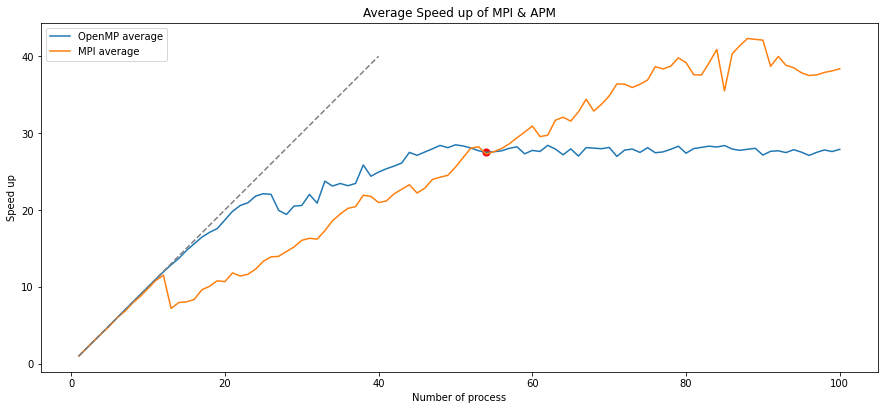

In [8]:
title = "Average Speed up of MPI & APM"

pmax = 100

pl.figure(1, figsize=(15, 15))
pl.plot(P_omp[:pmax],S_omp_AVG[:pmax],label="OpenMP average")
pl.plot(P_mpi[:pmax],S_mpi_AVG[:pmax],label="MPI average")
pl.plot(P_omp[:min(40,pmax)],P_omp[:min(40,pmax)],color="grey",linestyle='dashed')
pl.scatter([54],[27.5],color="red",marker=".",s=200)
pl.axis('scaled')
pl.xlabel('Number of process')
pl.ylabel('Speed up')
pl.legend(loc="upper left")
pl.title(title)

pl.show()

# OpenMP + MPI APM 

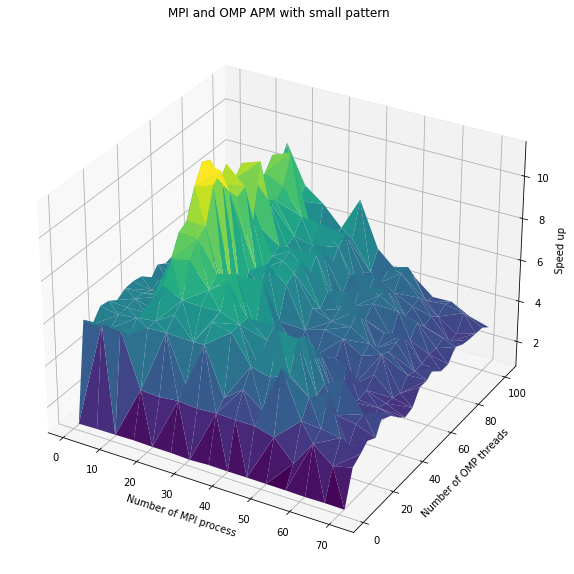

In [87]:
T_s = []
T_p = []
P_mpi = [5*i+1 for i in range(15)]
P_omp = [5*i+1 for i in range(21)]

first = True
for i in range(len(P_mpi)) :
    p = P_mpi[i] 
    T_p.append([])
    T_pAVG.append([])
    with open('./apm/apm_omp_mpi/out_omp_mpi_'+str(p), 'r') as out_file:
        reader = csv.reader(out_file, delimiter=';')
        for row in reader :
            if first :
                first = False
                T_s = [float(row[i]) for i in range(3)]
                T_sAVG = (T_s[0] + T_s[2]*3 + T_s[2]*7)/11
            if len(row) >= 3 :
                T_p[i].append(list(map(lambda x: float(x),row[:3])))

title = "Speed up on MPI - OpenMP APM" 

labels = ["small pattern","medium pattern","long pattern"]

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

S=[ [ [],[],[]  ] , [ [],[],[] ] , [ [],[],[] ] ]

for i in range(len(P_mpi)) :
    for j in range(len(P_omp)) :
        for k in range(3) :
            S[k][0].append(P_mpi[i])
            S[k][1].append(P_omp[j])
            S[k][2].append(T_s[k]/T_p[i][j][k])

fig = pl.figure(figsize=(10,10))
ax = pl.axes(projection='3d')
x=S[0][0]
y=S[0][1]
z=S[0][2]


ax.set_xlabel('Number of MPI process')
ax.set_ylabel('Number of OMP threads')
ax.set_zlabel('Speed up')
ax.set_title("MPI and OMP APM with small pattern")
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');
pl.show()

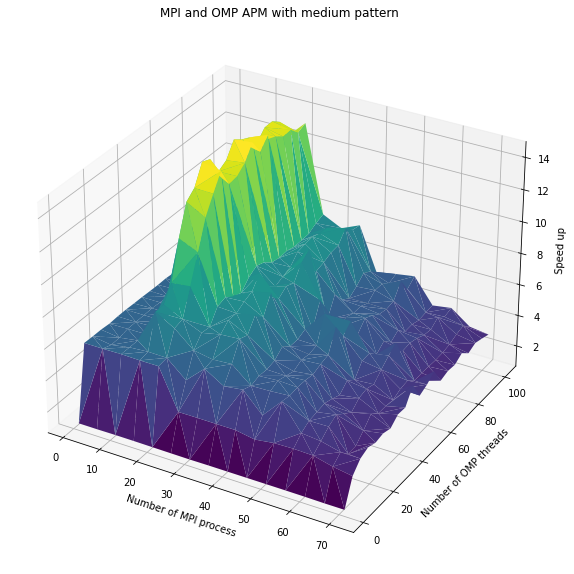

In [85]:
x=S[1][0]
y=S[1][1]
z=S[1][2]

fig = pl.figure(figsize=(10,10))
ax = pl.axes(projection='3d')
ax.set_xlabel('Number of MPI process')
ax.set_ylabel('Number of OMP threads')
ax.set_zlabel('Speed up')
ax.set_title("MPI and OMP APM with medium pattern")
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');
pl.show()

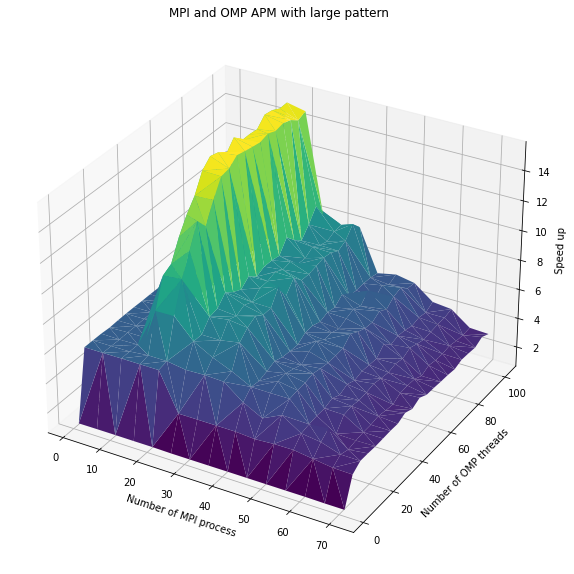

In [86]:
x=S[2][0]
y=S[2][1]
z=S[2][2]

fig = pl.figure(figsize=(10,10))
ax = pl.axes(projection='3d')
ax.set_xlabel('Number of MPI process')
ax.set_ylabel('Number of OMP threads')
ax.set_zlabel('Speed up')
ax.set_title("MPI and OMP APM with large pattern")
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');
pl.show()